In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from scipy.stats import ttest_ind
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from statistics import mean
from itertools import combinations

sns.set_style('darkgrid')

rp_data = pd.read_csv('muse_rp.csv')
lng_data = pd.read_excel('language_stats.xlsx', sheet_name=['hi', 'ta', 'te', 'kn', 'bn'])

lang_count = {}

for lang in lng_data.keys():
    d = lng_data.get(lang)
    ct_col = 'Transcript word count'
    print(lang, len(d), len(d[d[ct_col]>=100]))
#!rm -r plots; mkdir plots

rp_data['male_screentime'] = rp_data['masculine_faces']/(rp_data['feminine_faces']+rp_data['masculine_faces'])
rp_data['female_screentime'] = rp_data['feminine_faces']/(rp_data['feminine_faces']+rp_data['masculine_faces'])
rp_data['total_faces']=rp_data['feminine_faces']+rp_data['masculine_faces']

male_cols=[col for col in rp_data.columns if 'male' in col and 'female' not in col]
male_data=rp_data[male_cols]
male_data['masculine_faces']=rp_data['masculine_faces']
male_data['Programme Language']=rp_data['Programme Language']

female_cols=[col for col in rp_data.columns if 'female' in col]
female_data=rp_data[female_cols]
female_data['feminine_faces']=rp_data['feminine_faces']
female_data['Programme Language']=rp_data['Programme Language']


hi 240 205
ta 236 235
te 247 245
kn 231 225
bn 232 221


# Global Insights

###I. Screentime x Gender

Average screentimes: 0.5579562217877896 0.44204377821220975
Median screentimes: 0.5654213881019831 0.434578611898017
N=1199
p-value for screentime x gender: 1.4580085871807877e-75


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


BENGALI-> N=230, 230
p-value for gender for BENGALI language: 3.40441539237696e-36
HINDI-> N=268, 268
p-value for gender for HINDI language: 6.141317664090087e-06
KANNADA-> N=232, 232
p-value for gender for KANNADA language: 8.148864868427629e-07
TAMIL-> N=240, 240
p-value for gender for TAMIL language: 1.4315890722998364e-15
TELUGU-> N=229, 229
p-value for gender for TELUGU language: 2.857276189609455e-41
corrected p-value for languages BENGALI and HINDI: 1.3657964463240296e-05
corrected p-value for languages BENGALI and KANNADA: 2.2221544502835794e-05
corrected p-value for languages BENGALI and TAMIL: 2.2193486011042367e-05
corrected p-value for languages BENGALI and TELUGU: 0.07753813300550419
corrected p-value for languages HINDI and KANNADA: 0.08478300163907115
corrected p-value for languages HINDI and TAMIL: 0.0432326460555346
corrected p-value for languages HINDI and TELUGU: 2.0280917496020265e-05
corrected p-value for languages KANNADA and TAMIL: 0.05567836530039878
corrected p

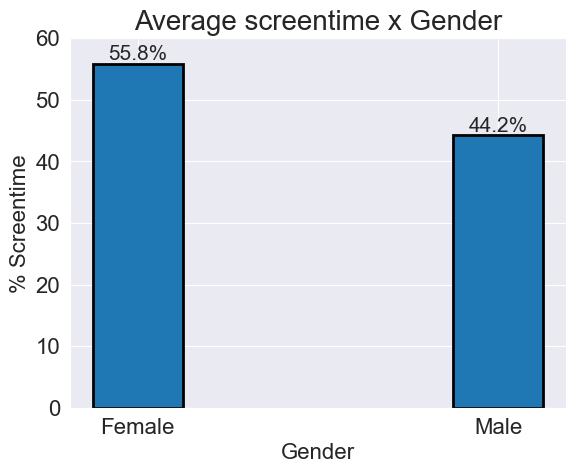

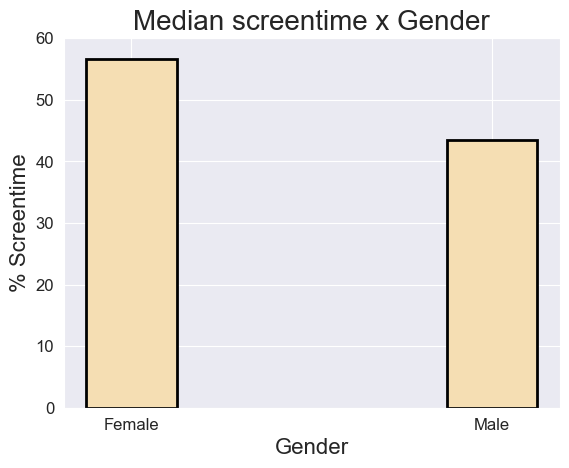

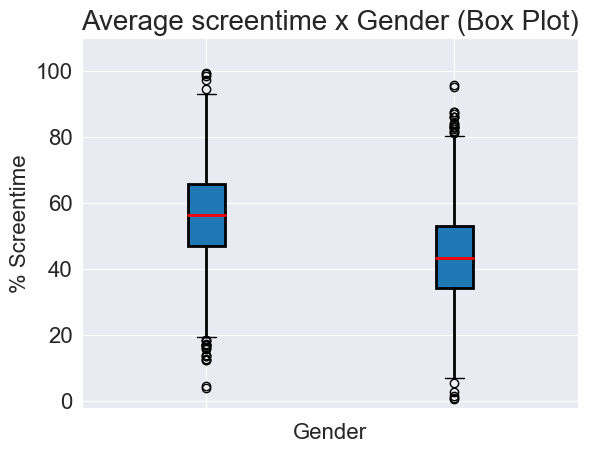

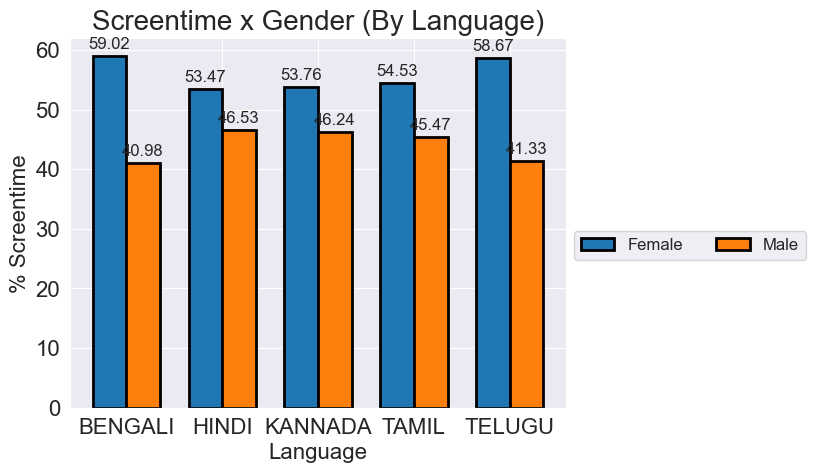

In [6]:
t, p = ttest_ind(list(rp_data['female_screentime']), list(rp_data['male_screentime']))
rp_data['male_screentime'] = rp_data['masculine_faces']/(rp_data['feminine_faces']+rp_data['masculine_faces'])
t, p = ttest_ind(list(rp_data['female_screentime']), list(rp_data['male_screentime']))

average_female_screentime=rp_data['female_screentime'].mean()
average_male_screentime=rp_data['male_screentime'].mean()

median_female_screentime=rp_data['female_screentime'].median()
median_male_screentime=rp_data['male_screentime'].median()
print('Average screentimes:',average_female_screentime,average_male_screentime)
print('Median screentimes:',median_female_screentime,median_male_screentime)

fig, ax = plt.subplots()
keys=['Female','Male']
print(f"N={len(rp_data['female_screentime'])}")
# create a bar plot of the dictionary
mean_screentime_gender=[average_female_screentime*100,average_male_screentime*100]
ax.bar(keys,mean_screentime_gender,
       edgecolor='black',linewidth=2,width=0.25)
for i, v in enumerate(mean_screentime_gender):
    ax.annotate(str(round((v/sum(mean_screentime_gender))*100, 2)) + "%", xy=(i, v), ha='center', va='bottom', fontsize=15)

# set the title and axis labels
ax.set_title('Average screentime x Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('% Screentime', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

#plt.show()
#save the plots
plt.savefig('plots/screentime_x_gender.eps', bbox_inches="tight", dpi=300, format='eps')
fig, ax = plt.subplots()

keys=['Female','Male']
ax.bar(keys, [median_female_screentime*100,median_male_screentime*100],
           edgecolor='black',
           linewidth=2, color='#F5DEB3', width=0.25)

# set the title and axis labels
ax.set_title('Median screentime x Gender', fontsize=20)
ax.set_xlabel('Gender', fontsize=16)
ax.set_ylabel('% Screentime', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

#plt.show()
#plt.savefig('plots/median_gender_screentime.eps', bbox_inches="tight", dpi=300, format='eps')
# create a figure and axis object

fig, ax = plt.subplots()

fm_sc_time=[x*100 for x in list(rp_data['female_screentime'])]
m_sc_time=[x*100 for x in list(rp_data['male_screentime'])]
t, p = ttest_ind(fm_sc_time, m_sc_time)
print(f'p-value for screentime x gender: {p}')

# create a boxplot of the data with custom labels
ax.boxplot([fm_sc_time,m_sc_time], labels=['Female','Male'],
              patch_artist=True,
              boxprops={'linewidth': 2},
              whiskerprops={'linewidth': 2},
              medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Average screentime x Gender (Box Plot)',fontsize=20)
ax.set_xlabel('Gender',fontsize=16)
ax.set_ylabel('% Screentime', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, fontsize=16)
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-2,110)

# set the rotation angle for the labels
#ax.set_xticklabels(labels, rotation=90, fontsize=16)
#plt.tight_layout()
plt.savefig('plots/screentime_x_gender_boxplot.eps', bbox_inches="tight", dpi=300)


#### BY LANGUAGE (STACKED)  ####
gender=('Male', 'Female')
width = 0.35  # the width of the bars
lng_data = rp_data.groupby("Programme Language")
x = np.arange(len(lng_data))  # the label locations
fig, ax = plt.subplots()
#bottom = 0
gxlng = {'Male':[], 'Female':[]}
mul = 0

for lang in lng_data.groups.keys():
    msc = lng_data.get_group(lang)['male_screentime']
    fsc = lng_data.get_group(lang)['female_screentime']
    print(f'{lang}-> N={len(msc)}, {len(fsc)}')
    gxlng['Male'].append(round(np.mean(msc)*100, 2))
    gxlng['Female'].append(round(np.mean(fsc)*100, 2))
    t, p = ttest_ind(msc, fsc)
    print(f'p-value for gender for {lang} language: {p}')
    #bar_value = [np.mean(msc)*100, np.mean(fsc)*100]
    #offset = width * multiplier
for gen in ['Female', 'Male']:
    #print(offset)
    #rects = ax.bar(x, gxlng[gen], width, label=gen, bottom=bottom, edgecolor='black',linewidth=2)
    offset = width * mul
    rects = ax.bar(x+offset, gxlng[gen], width, label=gen, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=12, )
    #bottom = gxlng[gen]
    mul += 1

ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('% Screentime',fontsize=16)
ax.set_title('Screentime x Gender (By Language)', fontsize=20)
ax.set_xticks(x+0.5*width, list(lng_data.groups.keys()))

ax.legend(bbox_to_anchor=(1.25, 0.5), ncol=3,fontsize=12, loc='upper center')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_gender_x_language.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)

## multiple comparisons t-test
fsc = {}
for lang in lng_data.groups.keys():
    fsc[lang] = lng_data.get_group(lang)['female_screentime']
combs = list(combinations(lng_data.groups.keys(), 2))
num_comb = len(combs)

for comb in combs:
    #print(np.mean(fsc[comb[0]]), np.mean(fsc[comb[1]]))
    t, p = ttest_ind(fsc[comb[0]], fsc[comb[1]])
    print(f'corrected p-value for languages {comb[0]} and {comb[1]}: {p/num_comb}')


In [ ]:
ttest_ind(fsc['BENGALI'].values, fsc['HINDI'].values).pvalue*1e5

## II. Screentime x Age

In [ ]:
dict_age_mapping={'age_1':"0-18",
                 'age_2':"18-33",
                 'age_3': "33-60",
                  'age_4': "60+"}
mean_age_wise_screentime=[]
median_age_wise_screentime=[]
values=[]
age_screentime_total_list=[]


for key in list(dict_age_mapping.keys()):
    age_screentime_total_list.append(list([x*100 for x in rp_data[key + '_screen_time']]))
    mean_age_wise_screentime.append(rp_data[key+"_screen_time"].mean()*100)


fig, ax = plt.subplots()
keys = dict_age_mapping.values()
ax.bar(keys, mean_age_wise_screentime,
           edgecolor='black',
           linewidth=2, width=0.25)
for i, v in enumerate(mean_age_wise_screentime):
    ax.annotate(str(round(v, 2)) + "%", xy=(i, v+1), ha='center', va='bottom', fontsize=12)


# set the title and axis labels
ax.set_title('Screentime vs Age', fontsize=20)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('% Screentime', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=16)

#plt.show()
plt.savefig('plots/screentime_x_age.eps', bbox_inches="tight", dpi=300)
# create a figure and axis object


fig, ax = plt.subplots()
ax.boxplot(age_screentime_total_list, labels=[dict_age_mapping[k] for k in list(dict_age_mapping.keys())],
          patch_artist=True,
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Screentime vs Age',fontsize=20)
ax.set_xlabel('Age',fontsize=16)
ax.set_ylabel('% Screentime', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-4,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=0, fontsize=16)
#plt.tight_layout()
plt.savefig('plots/screentime_x_age_boxplot.eps', bbox_inches="tight", dpi=300)


age_mean_ids=np.argsort(-np.array(mean_age_wise_screentime))
age_keys=list(dict_age_mapping.keys())
sorted_age_screentime=[mean_age_wise_screentime[i] for i in age_mean_ids]
age_keys_sorted=[age_keys[i] for i in age_mean_ids]
pvalues_list=[]
confidence=0.05
for i in range(len(age_keys_sorted)-1):

        c_i=rp_data[age_keys_sorted[i]+"_screen_time"]
        c_j=rp_data[age_keys_sorted[i+1]+"_screen_time"]

        t, p = ttest_ind(list(c_i), list(c_j))
        pvalues_list.append(p)
        print(f"t-test between {age_keys_sorted[i]} and {age_keys_sorted[i+1]}: t={t}, p={p}")

significant = np.array(pvalues_list)/(len(age_keys_sorted) - 1) < confidence
for j in range(len(age_keys_sorted)):
    if j == len(age_keys_sorted) - 1:
        print(f"{age_keys_sorted[j]}")
        break
    cat = age_keys_sorted[j]
    sign = ">" if significant[j] else "="
    print(f"{cat} {sign} ", end="")

### BY LANGUAGE
age_groups = dict_age_mapping.keys()
width = 0.2  # the width of the bars
lng_data = rp_data.groupby("Programme Language")
x = np.arange(len(lng_data))  # the label locations
fig, ax = plt.subplots()
mul = 0
#bottom = [0, 0, 0, 0, 0]
gxage = {k:[] for k in age_groups}

for lang in lng_data.groups.keys():
    for age in age_groups:
        d = lng_data.get_group(lang)
        asc = d[age + '_screen_time']
        gxage[age].append(round(np.mean(asc)*100, 2))

for age in age_groups:
    #print(age, dict_age_mapping[age])
    #rects = ax.bar(x, gxage[age], width, label=dict_age_mapping[age], bottom=bottom, edgecolor='black',linewidth=2)
    offset = width * mul
    rects = ax.bar(x + offset, gxage[age], width, label=dict_age_mapping[age], edgecolor='black',linewidth=2)
   # if age!='age_3':
    ax.bar_label(rects, padding=3, fontsize=12, )
    mul += 1
    #bottom = [bottom[i] + gxage[age][i] for i in range(5)]

combns = list(combinations(lng_data.groups.keys(), 2))
age = 'age_3'
for comb in combns:
    l0 = comb[0]
    l1 = comb[1]
    pval = ttest_ind(lng_data.get_group(l0)[age + '_screen_time'], lng_data.get_group(l1)[age + '_screen_time']).pvalue
    print(f'p-value for lang {l0} and {l1}: {pval/len(combns)}')

ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('% Screentime',fontsize=16)
ax.set_title('Screentime x Age (By Language)', fontsize=20)
ax.set_xticks(x+1.5*width, list(lng_data.groups.keys()))

ax.legend(bbox_to_anchor=(0.86, 1.06), ncol=3,fontsize=12, loc='upper center')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_age_x_language.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)

#### SCREENTIME X GENDER X AGE X LANGUAGE
age_groups = dict_age_mapping.keys()
width = 0.2  # the width of the bars
lng_data = rp_data.groupby("Programme Language")
x = np.arange(len(lng_data))  # the label locations
fig, ax = plt.subplots()
mul = 0
#bottom = [0, 0, 0, 0, 0]
gxage_male = {k:[] for k in age_groups}
gxage_raw = {k:{} for k in lng_data.groups.keys()}

dict_age_range = {'age_1': '[0, 18)', 'age_2': '[18, 33)', 'age_3': '[33, 60)', 'age_4': '[60, inf)'}
for lang in lng_data.groups.keys():
    d = lng_data.get_group(lang)
    total_male_faces = d['masculine_faces']
    for age in age_groups:
        relevant_cols = [x for x in d.columns if '(male' in x and dict_age_range[age] in x]
        asc = d[relevant_cols].sum(axis=1)/total_male_faces
        gxage_raw[lang][age] = asc
        gxage_male[age].append(round(np.mean(asc)*100, 2))

combns = list(combinations(lng_data.groups.keys(), 2))
num_c = len(combns)


for age in age_groups:
    print(age)
    for comb in combns:
        t, p = ttest_ind(gxage_raw[comb[0]][age], gxage_raw[comb[1]][age])
        print(f"{comb[0]} and {comb[1]}, pvalue: {p/num_c}")
    #print()
        
for age in age_groups:
    #print(age, dict_age_mapping[age])
    #rects = ax.bar(x, gxage[age], width, label=dict_age_mapping[age], bottom=bottom, edgecolor='black',linewidth=2)
    offset = width * mul
    rects = ax.bar(x + offset, gxage_male[age], width, label=dict_age_mapping[age], edgecolor='black',linewidth=2)
   # if age!='age_3':
    ax.bar_label(rects, padding=3, fontsize=12, )
    mul += 1
    #bottom = [bottom[i] + gxage[age][i] for i in range(5)]


ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('% Screentime',fontsize=16)
ax.set_title('Screentime x Male x Age (By Language)', fontsize=20)
ax.set_xticks(x+1.5*width, list(lng_data.groups.keys()))

ax.legend(bbox_to_anchor=(0.86, 1.06), ncol=3,fontsize=12, loc='upper center')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_male_age_x_language.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)


#### SCREENTIME X GENDER X AGE X LANGUAGE
age_groups = dict_age_mapping.keys()
width = 0.2  # the width of the bars
lng_data = rp_data.groupby("Programme Language")
x = np.arange(len(lng_data))  # the label locations
fig, ax = plt.subplots()
mul = 0
#bottom = [0, 0, 0, 0, 0]
gxage_female = {k:[] for k in age_groups}
gxage_raw = {k:{} for k in lng_data.groups.keys()}

dict_age_range = {'age_1': '[0, 18)', 'age_2': '[18, 33)', 'age_3': '[33, 60)', 'age_4': '[60, inf)'}
for lang in lng_data.groups.keys():
    d = lng_data.get_group(lang)
    total_female_faces = d['feminine_faces']
    for age in age_groups:
        relevant_cols = [x for x in d.columns if '(female' in x and dict_age_range[age] in x]
        asc = d[relevant_cols].sum(axis=1)/total_female_faces
        gxage_raw[lang][age] = asc
        gxage_female[age].append(round(np.mean(asc)*100, 2))

for age in age_groups:
    #print(age, dict_age_mapping[age])
    #rects = ax.bar(x, gxage[age], width, label=dict_age_mapping[age], bottom=bottom, edgecolor='black',linewidth=2)
    offset = width * mul
    rects = ax.bar(x + offset, gxage_female[age], width, label=dict_age_mapping[age], edgecolor='black',linewidth=2)
   # if age!='age_3':
    ax.bar_label(rects, padding=3, fontsize=12, )
    mul += 1
    #bottom = [bottom[i] + gxage[age][i] for i in range(5)]

    
combns = list(combinations(lng_data.groups.keys(), 2))
num_c = len(combns)


for age in age_groups:
    print(age)
    for comb in combns:
        t, p = ttest_ind(gxage_raw[comb[0]][age], gxage_raw[comb[1]][age])
        print(f"{comb[0]} and {comb[1]}, pvalue: {p/num_c}")
    #print()

ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('% Screentime',fontsize=16)
ax.set_title('Screentime x Female x Age (By Language)', fontsize=20)
ax.set_xticks(x+1.5*width, list(lng_data.groups.keys()))

ax.legend(bbox_to_anchor=(0.86, 1.06), ncol=3,fontsize=12, loc='upper center')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_female_x_age_x_language.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)

## III. Screentime x Skintone

In [ ]:
skintone_strings=["[-inf, 1.1)", "[1.1, 2.1)","[2.1, 3.1)","[3.1, 4.1)","[4.1, 5.1)",
                  "[5.1, 6.1)","[6.1, 7.1)","[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"]

mst_skintone_dict={'light': ["[-inf, 1.1)","[1.1, 2.1)","[2.1, 3.1)"],
                   'medium': ["[3.1, 4.1)","[4.1, 5.1)","[5.1, 6.1)","[6.1, 7.1)"],
                   'dark': ["[7.1, 8.1)","[8.1, 9.1)","[9.1, 10.1)"]
                  }
mst_interval_dict={"[-inf, 1.1)":"light", "[1.1, 2.1)":"light", "[2.1, 3.1)": "light",
                    "[3.1, 4.1)": "medium", "[4.1, 5.1)":"medium", "[5.1, 6.1)": "medium", "[6.1, 7.1)": "medium",
                     "[7.1, 8.1)": "dark", "[8.1, 9.1)":"dark", "[9.1,10.1)":"dark"}

mst_skintone_group_dict={'light':[],'medium':[],'dark':[]}


dict_skintone_screentime=dict()

for string_example in skintone_strings:
    if string_example in rp_data:
        continue
    col_sample=[col for col in rp_data.columns if string_example in col]
    sample_df=rp_data[col_sample]
    curr_sum=sample_df.sum(axis=1)
    rp_data[string_example]=curr_sum

#compute light, medium and dark screentime
rp_data['light']=rp_data['[-inf, 1.1)']+rp_data['[1.1, 2.1)']+rp_data['[2.1, 3.1)']
rp_data['medium']=rp_data['[3.1, 4.1)']+rp_data['[4.1, 5.1)']+rp_data['[5.1, 6.1)']+rp_data['[6.1, 7.1)']
rp_data['dark']=rp_data['[7.1, 8.1)']+rp_data['[8.1, 9.1)']+rp_data['[9.1, 10.1)']

#assert with light, medium and dark
cols_to_sum=['light','medium','dark']

check_equal=0
#loop over and check the sums with total_faces
for i in np.arange(rp_data.shape[0]):
    if(rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]==rp_data['total_faces'].iloc[i]):
        check_equal=check_equal+1
    else:
        sum_mst_skintone=rp_data['light'].iloc[i]+rp_data['medium'].iloc[i]+rp_data['dark'].iloc[i]
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print('Sum mst skintone:%d' %(sum_mst_skintone))
        print('Total faces:%d' %(rp_data['total_faces'].iloc[i]))
        print('Feminine faces:%d' %(rp_data['feminine_faces'].iloc[i]))
        print('Masculine faces:%d' %(rp_data['masculine_faces'].iloc[i]))
        print(rp_data['Cat No.'].iloc[i])

#plot the skintone unconditional distribution
def plot_skintone_screentime(data,keys,fname,metric="median"):
    fig, ax = plt.subplots()
    # create a bar plot of the dictionary
    ax.bar(keys, data, edgecolor='black',linewidth=2, width=0.25, align='center')

    for i, v in enumerate(data):
        ax.annotate(str(round((v/sum(data))*100, 2)) + "%", xy=(i, v), ha='center', va='bottom', fontsize=15)

    # set the title and axis labels
    title=metric+" screentime x Skintone"
    plt.xticks([0,1,2], keys)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Skintone', fontsize=12)
    ax.set_ylabel('% Screentime', fontsize=12)

    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    #plt.show()
    #save the plots
    #filename=metric+"_skintone_screentime.png"
    plt.savefig('plots/'+fname, bbox_inches="tight", dpi=300)


rp_data['light_screentime']=rp_data['light']/rp_data['total_faces']
rp_data['medium_screentime']=rp_data['medium']/rp_data['total_faces']
rp_data['dark_screentime']=rp_data['dark']/rp_data['total_faces']


#mean and median values of screentime
light_screentime_mean=rp_data['light_screentime'].mean()*100
medium_screentime_mean=rp_data['medium_screentime'].mean()*100
dark_screentime_mean=rp_data['dark_screentime'].mean()*100

light_screentime_median=rp_data['light_screentime'].median()*100
medium_screentime_median=rp_data['medium_screentime'].median()*100
dark_screentime_median=rp_data['dark_screentime'].median()*100

keys=['light','medium','dark']

#mean and median data
mean_data=[light_screentime_mean,medium_screentime_mean,dark_screentime_mean]
median_data=[light_screentime_median,medium_screentime_median,dark_screentime_median]
print(median_data)
print(mean_data)
plot_skintone_screentime(mean_data,keys,metric="average",fname='screentime_x_skintone_binned.eps')
#plot_skintone_screentime(median_data,keys,metric="median")
fig, ax = plt.subplots()
skintone_screentime_list=[[x*100 for x in list(rp_data['light_screentime'])],
                          [x*100 for x in list(rp_data['medium_screentime'])],
                          [x*100 for x in list(rp_data['dark_screentime'])]]

ax.boxplot(skintone_screentime_list, labels=['light','medium','dark'],
          patch_artist=True,
          boxprops={'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Screen time vs Skintone',fontsize=16)
ax.set_xlabel('Skintone',fontsize=12)
ax.set_ylabel('% Screentime', fontsize=12)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-2,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=0, fontsize=12)
plt.tight_layout()
plt.savefig('plots/screentime_x_skintone_binned_boxplot.eps', bbox_inches="tight", dpi=300)


skintone_data = np.array(rp_data[skintone_strings])
y = skintone_data/skintone_data.sum(axis=1, keepdims=True)
y = np.mean(y*100, axis=0)
x = np.arange(1, 11)
plt.figure(figsize=(22, 10))
bc = plt.bar(x, y, width=0.6, color=["#f6ede4","#f3e7db","#f7ead0","#eadaba","#d7bd96","#a07e56","#825c43","#604134","#3a312a","#292420"])
plt.bar_label(bc, [f"{yy:.1f}%" for yy in y], padding=10, fontsize=16)
plt.title("Screentime distribution of MST skintone bins", fontsize=20)
plt.xlabel("MST skintone bins", fontsize=20)
plt.ylabel("% Screentime", fontsize=20)
plt.xticks(x, x, fontsize=16)
plt.ylim(0, 100)
plt.tick_params(axis='y', labelsize=16)
#plt.legend([bc.patches[0], bc.patches[3], bc.patches[7]], ["light", "medium", "dark"], fontsize=16)
plt.savefig("plots/screentime_x_skintone.eps", bbox_inches="tight", pad_inches=0, dpi=300)


### BY LANGUAGE (stacked)
skintone_groups = ['light', 'medium', 'dark']
width = 0.25  # the width of the bars
lng_data = rp_data.groupby("Programme Language")
x = np.arange(len(lng_data))  # the label locations
fig, ax = plt.subplots()
bottom = [0, 0, 0, 0, 0]
gxst = {k:[] for k in skintone_groups}
mul = 0

for lang in lng_data.groups.keys():
    for st in skintone_groups:
        d = lng_data.get_group(lang)
        asc = d[st + '_screentime']
        gxst[st].append(round(np.mean(asc)*100,2))

for st in skintone_groups:
    #rint(age, dict_age_mapping[age])
    #rects = ax.bar(x, gxst[st], width, label=st, bottom=bottom, edgecolor='black',linewidth=2)
    offset = width * mul
    rects = ax.bar(x + offset, gxst[st], width, label=st, edgecolor='black',linewidth=2)
    #if st!='medium':
    ax.bar_label(rects, padding=3, fontsize=15 )
    #else:
    #  ax.bar_label(rects, padding=-18, fontsize=15, )
    #bottom = [bottom[i] + gxst[st][i] for i in range(5)]
    mul += 1


ax.set_xlabel('Language', fontsize=16)
ax.set_ylabel('% Screentime',fontsize=16)
ax.set_title('Screentime x Skintone (By Language)', fontsize=20)
ax.set_xticks(x+width, list(lng_data.groups.keys()))

ax.legend(bbox_to_anchor=(0.86, 1.06), ncol=3,fontsize=12, loc='upper center')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_skintone_x_language.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)


combns = list(combinations(lng_data.groups.keys(), 2))
num_c = len(combns)

st='medium'
print(f't-tests for {st} skintone')
for comb in combns:
    t, p = ttest_ind(lng_data.get_group(comb[0])[st+'_screentime'], lng_data.get_group(comb[1])[st+'_screentime'])
    print(f"{comb[0]} and {comb[1]}, pvalue: {p/num_c}")

st='dark'
print(f't-tests for {st} skintone')
for comb in combns:
    t, p = ttest_ind(lng_data.get_group(comb[0])[st+'_screentime'], lng_data.get_group(comb[1])[st+'_screentime'])
    print(f"{comb[0]} and {comb[1]}, pvalue: {p/num_c}")

### BY LANGUAGE and GENDER (stacked + grouped)

for st in skintone_groups:
    male_cols, female_cols = [], []
    for age in age_bins:
        for intr in mst_skintone_dict[st]:
            male_cols.append(f"(male, {age}, {intr})")
            female_cols.append(f"(female, {age}, {intr})")
    male_data[st + '_screentime'] = rp_data[[col for col in male_cols]].sum(1)
    female_data[st + '_screentime'] = rp_data[[col for col in female_cols]].sum(1)

    
gxst = {k:{'male':[], 'female':[]} for k in skintone_groups}


for st in skintone_groups:
    for lang in lng_data.groups.keys():
        dm = male_data.groupby("Programme Language").get_group(lang)
        df = female_data.groupby("Programme Language").get_group(lang)
        msc = dm[st + '_screentime']
        fsc = df[st + '_screentime']
        mfrac = msc/(msc+fsc)
        ffrac = fsc/(msc+fsc)
        gxst[st]['male'].append(round(np.mean(mfrac)*100,2))
        gxst[st]['female'].append(round(np.mean(ffrac)*100, 2))

#fig, axs = plt.subplots(1,4, figsize = (32, 4))
x = np.arange(3)
width = 0.25

plt.figure(figsize=(30,20))
ax = []
ax.append(plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2))
ax.append(plt.subplot2grid((2,6), (0,2), colspan=2))
ax.append(plt.subplot2grid((2,6), (0,4), colspan=2))
ax.append(plt.subplot2grid((2,6), (1,1), colspan=2))
ax.append(plt.subplot2grid((2,6), (1,3), colspan=2))

for i, lang in enumerate(lng_data.groups.keys()):
    mul=0
    for gen in ['male', 'female']:
        plot_data = [gxst['light'][gen][i], gxst['medium'][gen][i], gxst['dark'][gen][i]]
        offset = width * mul
        rects = ax[i].bar(x + offset, plot_data, width, label=gen, edgecolor='black',linewidth=2)
        ax[i].bar_label(rects, padding=3, fontsize=15 )
        mul += 1
 

    #ax[i].set_xlabel('Skintone', fontsize=16)
    ax[i].set_title(f'{lang}', fontsize=20)
    ax[i].set_ylabel('% Screentime',fontsize=16)
    ax[i].set_xticks(x+0.5*width, skintone_groups)
    ax[i].tick_params(axis='y', labelsize=16)
    ax[i].tick_params(axis='x', labelsize=16)
plt.figlegend(['male', 'female'], loc=(0.85, 0.25), fontsize='xx-large')
#ax.set_suptitle('Screentime x Skintone x Gender (By Language)', fontsize=20)
filename="screentime_x_skintone_x_language_x_gender.eps"
filename="screentime_x_skintone_x_language_x_gender.png"
#plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)

                    
# for st in skintone_groups:
#     bottom = [0 for _ in range(len(lng_data.groups.keys()))]
#     for i, gen in enumerate(['male', 'female']):
#         print(x, offset, bottom)
#         print(gxst[st][gen])
#         #rint(age, dict_age_mapping[age])
#         #rects = ax.bar(x, gxst[st], width, label=st, bottom=bottom, edgecolor='black',linewidth=2)
#         offset = width * mul
#         rects = ax.bar(x + offset, gxst[st][gen], width, label=st, bottom=bottom, edgecolor='black',linewidth=2)
#         #if st!='medium':
#         ax.bar_label(rects, padding=3, fontsize=15 )
#         #else:
#         #  ax.bar_label(rects, padding=-18, fontsize=15, )
#         bottom = [bottom[i] + gxst[st][gen][i] for i in range(5)]
#         #bottom = [bottom[i] + gxst[st][i] for i in range(5)]
#         if gen == 'female':
#             mul += 1
    
gxst_male = {k: [] for k in skintone_groups}
gxst_female = {k: [] for k in skintone_groups}

for lang in lng_data.groups.keys():
    dm = male_data.groupby("Programme Language").get_group(lang)
    df = female_data.groupby("Programme Language").get_group(lang)
    
    for st in skintone_groups:        
        msc = dm[st + '_screentime']
        fsc = df[st + '_screentime']
        mfrac = msc/(dm['light_screentime'] + dm['medium_screentime'] + dm['dark_screentime'])
        ffrac = fsc/(df['light_screentime'] + df['medium_screentime'] + df['dark_screentime'])
        #mfrac = msc/(msc+fsc)
        #ffrac = fsc/(msc+fsc)
        gxst_male[st].append(round(np.mean(mfrac)*100,2))
        gxst_female[st].append(round(np.mean(ffrac)*100, 2))
print(gxst_male[st])

    
x = np.arange(2)
width = 0.25

plt.figure(figsize=(30,20))
ax = []
ax.append(plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2))
ax.append(plt.subplot2grid((2,6), (0,2), colspan=2))
ax.append(plt.subplot2grid((2,6), (0,4), colspan=2))
ax.append(plt.subplot2grid((2,6), (1,1), colspan=2))
ax.append(plt.subplot2grid((2,6), (1,3), colspan=2))

for i, lang in enumerate(lng_data.groups.keys()):
    mul=0
    for st in skintone_groups:
        plot_data = [gxst_male[st][i], gxst_female[st][i]]
        offset = width * mul
        rects = ax[i].bar(x + offset, plot_data, width, label=st, edgecolor='black',linewidth=2)
        ax[i].bar_label(rects, padding=3, fontsize=15 )
        mul += 1
 

    #ax[i].set_xlabel('Skintone', fontsize=16)
    ax[i].set_title(f'{lang}', fontsize=20)
    ax[i].set_ylabel('% Screentime',fontsize=16)
    ax[i].set_xticks(x+width, ['male', 'female'])
    ax[i].tick_params(axis='y', labelsize=16)
    ax[i].tick_params(axis='x', labelsize=16)
plt.figlegend(skintone_groups, loc=(0.85, 0.25), fontsize='xx-large')
#ax.set_suptitle('Screentime x Skintone x Gender (By Language)', fontsize=20)
filename="screentime_x_gender_x_skintone_x_language.eps"
#filename="screentime_x_skintone_x_language_x_gender.png"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)


In [ ]:
print(male_data['dark_screentime'].sum())

## IV. Screentime x Gender x Age

In [ ]:
age =  '[0, 18)'
male_cols = [col for col in male_data.columns if age in col]
print(age, male_cols)
print(male_data[male_cols].sum(1))


In [ ]:

male_data_mean=[]
female_data_mean=[]
age_bins=['[0, 18)','[18, 33)','[33, 60)','[60, inf)']

for age in age_bins:
    age_col=[col for col in male_data.columns if age in col]
    percent_val=(male_data[age_col].sum(1)/male_data['masculine_faces']).mean()
    male_data_mean.append(percent_val*100)

for age in age_bins:
    age_col=[col for col in female_data.columns if age in col]
    percent_val=(female_data[age_col].sum(1)/female_data['feminine_faces']).mean()
    female_data_mean.append(percent_val*100)
#plotting the male vs female grouped bar plot
plt.rcParams["figure.figsize"] = (15,10)
index=['male','female']
dict_age_sample={}

for i,v in enumerate(age_bins):
    dict_age_sample[v]=[round(male_data_mean[i],2),round(female_data_mean[i],2)]
dict_age_sample
gender=('Male', 'Female')
x = np.arange(len(gender))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dict_age_sample.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('% Screentime',fontsize=20)
ax.set_title('Screentime x Gender x Age', fontsize=20)
ax.set_xticks(x + 0.23, gender)

ax.legend(loc='center', bbox_to_anchor=(0.5, 0.8), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_gender_x_age.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)
filename="screentime_x_gender_x_age.png"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)

### Transposing the axes
plot_data = {'male':[], 'female':[]}
for age in age_bins:
    male_cols = [col for col in male_data.columns if age in col]
    female_cols = [col for col in female_data.columns if age in col]
   # print(age, male_cols, female_cols)
    male_faces = male_data[male_cols].sum(1)
    female_faces = female_data[female_cols].sum(1)
    frac_male = (male_faces/(male_faces+female_faces)).mean()*100
    frac_female = (female_faces/(male_faces+female_faces)).mean()*100
    plot_data['male'].append(round(frac_male,2))
    plot_data['female'].append(round(frac_female,2))
    
    #age_data_mean[age] = [frac_male, frac_female]

x = np.arange(len(age_bins))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in plot_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('% Screentime',fontsize=20)
ax.set_title('Screentime x Age x Gender', fontsize=20)
ax.set_xticks(x + 0.5*width, age_bins)

ax.legend(loc='center', bbox_to_anchor=(0.85, 0.95), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

filename="screentime_x_age_x_gender.eps"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)
filename="screentime_x_age_x_gender.png"
plt.savefig('plots/'+filename, bbox_inches="tight", dpi=300)


## V. Screentime x Gender x Skintone

In [ ]:
for skintone in skintone_strings:
    if skintone not in male_data:
      sk_male_col=[col for col in male_data.columns if skintone in col]
      sk_male_data=male_data[sk_male_col]
      male_data[skintone]=sk_male_data.sum(axis=1)
    if skintone not in female_data:
      sk_female_col=[col for col in female_data.columns if skintone in col]
      sk_female_data=female_data[sk_female_col]
      female_data[skintone]=sk_female_data.sum(axis=1)

male_data['light']=male_data['[-inf, 1.1)']+male_data['[1.1, 2.1)']+male_data['[2.1, 3.1)']
male_data['medium']=male_data['[3.1, 4.1)']+male_data['[4.1, 5.1)']+male_data['[5.1, 6.1)']+male_data['[6.1, 7.1)']
male_data['dark']=male_data['[7.1, 8.1)']+male_data['[8.1, 9.1)']+male_data['[9.1, 10.1)']

female_data['light']=female_data['[-inf, 1.1)']+female_data['[1.1, 2.1)']+female_data['[2.1, 3.1)']
female_data['medium']=female_data['[3.1, 4.1)']+female_data['[4.1, 5.1)']+female_data['[5.1, 6.1)']+female_data['[6.1, 7.1)']
female_data['dark']=female_data['[7.1, 8.1)']+female_data['[8.1, 9.1)']+female_data['[9.1, 10.1)']
skintone_bins=['light','medium','dark']
male_data_skintone_mean=[]
female_data_skintone_mean=[]
for sk_bin in skintone_bins:
    mt = male_data[sk_bin]/male_data['masculine_faces']
    ft = female_data[sk_bin]/female_data['feminine_faces']
    print(sk_bin, ttest_ind(mt, ft).pvalue)
    male_sk_mean=((male_data[sk_bin]).sum())/(male_data['masculine_faces'].sum())
    male_data_skintone_mean.append(male_sk_mean*100)

    female_sk_mean=((female_data[sk_bin]).sum())/(female_data['feminine_faces'].sum())
    female_data_skintone_mean.append(female_sk_mean*100)
plt.rcParams["figure.figsize"] = (15,10)
sns.set_style('darkgrid')
index=['male','female']
x = np.arange(len(index))
dict_sk_sample={}
width=0.25
multiplier=0

for i,v in enumerate(skintone_bins):
    dict_sk_sample[v]=[male_data_skintone_mean[i],female_data_skintone_mean[i]]

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in dict_sk_sample.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Gender', fontsize=20)
ax.set_ylabel('Screentime',fontsize=20)
ax.set_title('Skintone based screentime vs gender', fontsize=20)
ax.set_xticks(x + width, index)
ax.legend(loc='center', bbox_to_anchor=(0.38, 0.8), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

filename="screentime_x_gender_x_skintone.eps"
plt.savefig('plots/'+filename,bbox_inches="tight", dpi=300)


In [ ]:
age_st_data = {k: {} for k in age_bins}
rp_data = rp_data.fillna(0)
for age_grp in age_bins:
    age_st_data[age_grp]['light'] = rp_data[f'(male, {age_grp}, [-inf, 1.1))'] + rp_data[f'(male, {age_grp}, [1.1, 2.1))'] + rp_data[f'(male, {age_grp}, [2.1, 3.1))'] + rp_data[f'(female, {age_grp}, [-inf, 1.1))'] + rp_data[f'(female, {age_grp}, [1.1, 2.1))'] + rp_data[f'(female, {age_grp}, [2.1, 3.1))']
    age_st_data[age_grp]['medium'] = rp_data[f'(male, {age_grp}, [3.1, 4.1))'] + rp_data[f'(male, {age_grp}, [4.1, 5.1))'] + rp_data[f'(male, {age_grp}, [5.1, 6.1))'] + rp_data[f'(male, {age_grp}, [6.1, 7.1))'] + rp_data[f'(female, {age_grp}, [3.1, 4.1))'] + rp_data[f'(female, {age_grp}, [4.1, 5.1))'] + rp_data[f'(female, {age_grp}, [5.1, 6.1))'] + rp_data[f'(female, {age_grp}, [6.1, 7.1))']
    age_st_data[age_grp]['dark'] = rp_data[f'(male, {age_grp}, [7.1, 8.1))'] + rp_data[f'(male, {age_grp}, [8.1, 9.1))'] + rp_data[f'(male, {age_grp}, [9.1, 10.1))'] + rp_data[f'(female, {age_grp}, [7.1, 8.1))'] + rp_data[f'(female, {age_grp}, [8.1, 9.1))'] + rp_data[f'(female, {age_grp}, [9.1, 10.1))']

age_st_mean = {k:[] for k in skintone_bins}

for st in skintone_bins:
    for age_grp in age_bins:
        grpmean = age_st_data[age_grp][st]/(age_st_data[age_grp]['light'] + age_st_data[age_grp]['medium'] + age_st_data[age_grp]['dark'])*100
        age_st_mean[st].append(round(grpmean.mean(), 2))

for age_grp in age_bins:
    print(age_grp,sum([(age_st_data[age_grp][x]!=0).sum() for x in skintone_bins]))
    
plt.rcParams["figure.figsize"] = (25,10)
sns.set_style('darkgrid')
x = np.arange(len(age_bins))
width=0.25
multiplier=0

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in age_st_mean.items():
    print(x)
    print(measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, edgecolor='black',linewidth=2)
    ax.bar_label(rects, padding=3, fontsize=15, )
    multiplier += 1

ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Screentime',fontsize=20)
ax.set_title('Skintone based screentime vs age', fontsize=20)
ax.set_xticks(x + width, age_bins)
ax.legend(loc='center', bbox_to_anchor=(0.8, 0.95), ncol=3,fontsize=16)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

filename="screentime_x_age_x_skintone.eps"
plt.savefig('plots/'+filename,bbox_inches="tight", dpi=300)
    

In [ ]:
idm = male_data[[x for x in male_data.columns if '(male' in x]]
age_bins=['[60, inf)','[33, 60)','[18, 33)','[0, 18)']

### ALL skintones
hmdata = np.zeros((len(age_bins), len(skintone_strings)), dtype=float)
tot_faces = idm.sum(axis=1)

for i, age in enumerate(age_bins):
  for j, st in enumerate(skintone_strings):
    fraction_faces = idm[f'(male, {age}, {st})']/tot_faces
    hmdata[i,j] = np.mean(fraction_faces)*100

cmap = matplotlib.colormaps["Reds"]
#cmap = matplotlib.colors.ListedColormap(cmap)
#cmap.set_under("none")
height = len(age_bins) * 1.2
width = len(skintone_strings)
plt.figure(figsize=(width, height))
ax = plt.gca()
sns.heatmap(hmdata, xticklabels=skintone_strings, yticklabels=age_bins, annot=True, fmt=".2f",
                    linewidth=1, cmap=cmap, annot_kws={"fontsize":"small"}, cbar=True, vmin=0, vmax=100,
                    linecolor="black", ax=ax)
ax.set_xticklabels(skintone_strings, fontsize="x-small", rotation=45)
ax.set_yticklabels(age_bins, fontsize="small")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize="small")
ax.set_xlabel('Skintone', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title(f"Male screentime x Age x Skintone", fontsize="large")
figure = ax.get_figure()
figure.savefig('plots/screentime_x_age_x_skintone_x_male.eps', dpi=300, bbox_inches="tight")

### BINNED skintone

st_bins = ['light', 'medium', 'dark']
hmdata_bin = np.zeros((len(age_bins), len(st_bins)), dtype=float)

for age in age_bins:
  for stkey, stval in mst_skintone_dict.items():
    key = f'(male, {age}, {stkey})'
    binkeys = [f'(male, {age}, {v})' for v in stval]
    idm_sub = idm[binkeys]
    d = idm_sub.sum(axis=1)
    idm.loc[:,key] = d

for i, age in enumerate(age_bins):
  for j, st in enumerate(st_bins):
    fraction_faces = idm[f'(male, {age}, {st})']/tot_faces
    hmdata_bin[i,j] = np.mean(fraction_faces)*100

height = len(age_bins) * 1.2
width = len(st_bins)
plt.figure(figsize=(width, height))
ax = plt.gca()
sns.heatmap(hmdata_bin, xticklabels=st_bins, yticklabels=age_bins, annot=True, fmt=".2f",
                    linewidth=1, cmap=cmap, annot_kws={"fontsize":"small"}, cbar=True, vmin=0, vmax=100,
                    linecolor="black", ax=ax)
ax.set_xticklabels(st_bins, fontsize="x-small", rotation=45)
ax.set_yticklabels(age_bins, fontsize="small")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize="small")
ax.set_xlabel('Skintone', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title(f"Male screentime x Age x Skintone binned", fontsize="large")
figure = ax.get_figure()
figure.savefig('plots/screentime_x_age_x_skintone-binned_x_male.eps', dpi=300, bbox_inches="tight")




In [ ]:
idm = female_data[[x for x in female_data.columns if '(female' in x]]

### ALL skintones
hmdata = np.zeros((len(age_bins), len(skintone_strings)), dtype=float)
tot_faces = idm.sum(axis=1)

for i, age in enumerate(age_bins):
  for j, st in enumerate(skintone_strings):
    fraction_faces = idm[f'(female, {age}, {st})']/tot_faces
    hmdata[i,j] = np.mean(fraction_faces)*100

cmap = matplotlib.colormaps["Reds"]
#cmap = matplotlib.colors.ListedColormap(cmap)
#cmap.set_under("none")
height = len(age_bins) * 1.2
width = len(skintone_strings)
plt.figure(figsize=(width, height))
ax = plt.gca()
sns.heatmap(hmdata, xticklabels=skintone_strings, yticklabels=age_bins, annot=True, fmt=".2f",
                    linewidth=1, cmap=cmap, annot_kws={"fontsize":"small"}, cbar=True, vmin=0, vmax=100,
                    linecolor="black", ax=ax)
ax.set_xticklabels(skintone_strings, fontsize="x-small", rotation=45)
ax.set_yticklabels(age_bins, fontsize="small")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize="small")
ax.set_xlabel('Skintone', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title(f"Female screentime x Age x Skintone", fontsize="large")
figure = ax.get_figure()
figure.savefig('plots/screentime_x_age_x_skintone_x_female.eps', dpi=300, bbox_inches="tight")

### BINNED skintone

st_bins = ['light', 'medium', 'dark']
hmdata_bin = np.zeros((len(age_bins), len(st_bins)), dtype=float)

for age in age_bins:
  for stkey, stval in mst_skintone_dict.items():
    key = f'(female, {age}, {stkey})'
    binkeys = [f'(female, {age}, {v})' for v in stval]
    idm_sub = idm[binkeys]
    d = idm_sub.sum(axis=1)
    idm.loc[:,key] = d

for i, age in enumerate(age_bins):
  for j, st in enumerate(st_bins):
    fraction_faces = idm[f'(female, {age}, {st})']/tot_faces
    hmdata_bin[i,j] = np.mean(fraction_faces)*100

height = len(age_bins) * 1.2
width = len(st_bins)
plt.figure(figsize=(width, height))
ax = plt.gca()
sns.heatmap(hmdata_bin, xticklabels=st_bins, yticklabels=age_bins, annot=True, fmt=".2f",
                    linewidth=1, cmap=cmap, annot_kws={"fontsize":"small"}, cbar=True, vmin=0, vmax=100,
                    linecolor="black", ax=ax)
ax.set_xticklabels(st_bins, fontsize="x-small", rotation=45)
ax.set_yticklabels(age_bins, fontsize="small")
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize="small")
ax.set_xlabel('Skintone', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title(f"Female screentime x Age x Skintone binned", fontsize="large")
figure = ax.get_figure()
figure.savefig('plots/screentime_x_age_x_skintone-binned_x_female.eps', dpi=300, bbox_inches="tight")

